# Using Google Colab

Read through the **Getting started** paragraph in the [official documentation](https://colab.research.google.com/). You may also want to take a look into the **More resources** section.

To add a new code block or text block, use the buttons in the menus above or hover your mouse between two blocks, where more buttons should appear.

To execute all code blocks within this document, select `Runtime -> Run all`. When you submit your solution, this should run without throwing an error.

Sometimes, previously defined variables cause trouble in later executions. If this is the case, you can select `Runtime -> Restart runtime` to restart the runtime and erase all previous definitions.

# Work Distribution

For the assignment, our group of 4 students worked together to implement sorting algorithms and analyze their performance. The tasks were divided as follows:

Xingming: Implemented the Merge Sort algorithm, including the merge function and recursive mergesort. Also tested the implementation using the provided test cases.

Martina: Implemented the Quick Sort algorithm, including the partition function and recursive quicksort. Additionally, ran test cases to ensure the correct sorting behavior.

Marie: Implemented the Heap Sort algorithm, including max_heapify, build_max_heap, and heapsort functions. Also handled testing and debugging the implementation.

Rui: Ran the runtime comparisons for the three sorting algorithms (Merge Sort, Quick Sort, Heap Sort) and analyzed their performance.

Additionally, all members discussed the runtime comparisons and constant approximation for Heap Sort runtime and Marie wrote the answers for the runtime approximation section. We also ensured all code ran smoothly in Colab.

# Initialisation

This section contains code that is later used to test, measure and plot your implementations. You need to run it once to initialise it.

⇩ Click here to initialise the code.

In [1]:
# tests

import random

def shuffle(list):
  random.shuffle(list)
  return list

tests = [(name, unsorted, sorted(unsorted)) for (name, unsorted) in [
    ("empty list", []),
    ("one element", [42]),
    ("digits ascending", list(range(10))),
    ("digits descending", list(reversed(range(10)))),
    ("digits shuffled", shuffle(list(range(10)))),
    ("all entries the same", [42 for _ in range(10)]),
    ("some duplicates", shuffle(list(range(10)) + list(range(5)))),
    ("negative numbers", shuffle([x - 10 for x in list(range(20))])),
    ("float numbers", shuffle([x * 3.14 for x in list(range(20))])),
    ("mixed numbers", shuffle([x * 3.14 for x in list(range(10))] + list(range(10)))),
    *[("random numbers " + str(idx) + " (small)", [random.randrange(1000) for _ in range(20)]) for idx in range(0, 5)],
    *[("random numbers " + str(idx) + " (medium)", [random.randrange(10000) for _ in range(200)]) for idx in range(5, 10)],
    *[("random numbers " + str(idx) + " (large)", [random.randrange(100000) for _ in range(2000)]) for idx in range(10, 15)],
]]

def run_tests(fun):
  print("executing all tests on %s..." % (fun.__name__))
  ok = 0
  err = 0
  for name, input, expected in tests:
    copy = input.copy()
    try:
      fun(copy)
    except Exception as e:
      print("Test '%s' raised an exception!\n  input:     %s\n  expected:  %s\n  exception: %s" % (name, input, expected, e))
      raise e
    else:
      if copy == expected:
        print("Test '%s' passed!" % (name))
        ok += 1
      else:
        print("Test '%s' failed!\n  input:     %s\n  output:    %s\n  expected:  %s" % (name, input, copy, expected))
        err +=1
  print("%s (summary): %d/%d OK, %d/%d ERROR" % (fun.__name__, ok, len(tests), err, len(tests)))

# runtime parameters
num_samples = 20
sizes = [2000 * i for i in range(1, 10)]

# runtime measurement
import time
runtimeDict = {}
def measure_runtime(funs):
  inputs = [[[random.random() for _ in range(size)] for _ in range(num_samples)] for size in sizes]

  for fun in funs:
    runtimes = []
    for batch in inputs:
      batch_rt = []
      for input in batch:
        copy = input.copy()
        start_time = time.time()
        fun(copy)
        end_time = time.time()
        batch_rt.append(end_time - start_time)
      runtimes.append(min(batch_rt))
    runtimeDict[fun.__name__] = runtimes

# runtime plot
import matplotlib.pyplot as plt
def plot_runtime(funs, funs_checkered=None):
  for fun in funs:
    plt.plot(sizes, runtimeDict[fun.__name__], label=fun.__name__)
  if funs_checkered:
    plt.gca().set_prop_cycle(None)
    for fun in funs_checkered:
      plt.plot(sizes, runtimeDict[fun.__name__], '--', label=fun.__name__)

  plt.xlabel('List Length')
  plt.ylabel('Runtime (seconds)')
  plt.title('Runtime vs List Length')

  plt.legend()
  plt.show()

# Sorting Algorithms

In this exercise, you are going to implement the *Merge Sort*, *Quick Sort* and *Heap Sort* algorithms.

- Each of your sorting functions should accept an unsorted list of numbers and sort it. Of course, you are allowed to add as many helper functions as needed.
- Note that arrays (or lists) in the textbook are indexed from 1, whereas in Python (and most other programming languages) they are indexed from 0.
- Your implementation should have a good performance with respect to the asymptotic complexity found in the literature.

At the bottom of each code block, there is a function call to test your algorithm implementation. Run it to check if your implementation is correct.

Below the algorithms in this document, there is a code block that reports runtime statistics. Furthermore, at the end of the document, there are a couple of questions you should answer.

### 1. Merge Sort (2 points)

Implement Merge Sort as seen in the lecture.

Hint: Start by implementing `merge` and then use it to implement `mergesort`.

In [2]:
def merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q
    L = [A[p + i] for i in range(n1)]
    R = [A[q + j + 1] for j in range(n2)]
    L.append(float("inf"))
    R.append(float("inf"))
    i, j = 0, 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

def mergesort(A, p=0, r=None):
    if r == None:
        r = len(A) - 1
    if p < r:
        q = (p + r) // 2
        mergesort(A, p, q)
        mergesort(A, q + 1, r)
        merge(A, p, q, r)
        
run_tests(mergesort)

executing all tests on mergesort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
mergesort (summary): 25/25 OK, 0/25 ERROR


### 2. Quick Sort (2 points)

Implement Quick Sort as seen in the lecture.

Hint: Start by implementing `partition` and then use it to implement `quicksort`.

In [3]:
def partition(arr, low, high):
    pivot = arr[high] #pivot
    i = low - 1  #index for smallest element

    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  #swap

    arr[i + 1], arr[high] = arr[high], arr[i + 1] #put pivot at the correct position
    return i + 1  #return pivot index

def quicksort(arr):
    def _quicksort(arr, low, high):
        if low < high:
            partition_ = partition(arr, low, high)  #partition to get pivot index
            _quicksort(arr, low, partition_ - 1)  #sort left half
            _quicksort(arr, partition_+1, high)  #sort right half

    _quicksort(arr, 0, len(arr) - 1)


run_tests(quicksort)


executing all tests on quicksort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
quicksort (summary): 25/25 OK, 0/25 ERROR


### 3. Heap Sort (3 points)

Implement Heap Sort as seen in the lecture.

Note that you do not have to define a new class for heaps (unless you
want to), instead you can just use a plain list to store the heap and
pass along an extra parameter `heap_size` to the functions that need it.

Hint: Start by implementing `max_heapify` and `build_max_heap`, and then use them to implement `heapsort`.

In [4]:
def max_heapify(A, i, heap_size):
  L = 2*i+1
  R = 2*i+2
  if L < heap_size and A[L] > A[i]:
    m = L
  else:
    m = i
  if R < heap_size and A[R] > A[m]:
    m = R
  if m != i:
    A[i], A[m] = A[m], A[i]
    max_heapify(A, m, heap_size)

def build_max_heap(A, heap_size):
  for i in range(len(A) // 2 - 1, -1, -1):
    max_heapify(A, i, heap_size)


def heapsort(A):
  heap_size = len(A)
  build_max_heap(A, heap_size)
  for i in range(len(A)-1, 0, -1):
    A[0], A[i] = A[i], A[0]
    heap_size -= 1
    max_heapify(A,0,heap_size)


run_tests(heapsort)

executing all tests on heapsort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
heapsort (summary): 25/25 OK, 0/25 ERROR


### 4. Runtime Comparisons (2 points)

The following code will measure the runtime of your algorithm implementations.

Compare the reported runtimes. What do you observe? How do you explain your observations?

How do the runtimes compare to those from the first assignment sheet (Insertion Sort, Selection Sort, Sink Sort)?

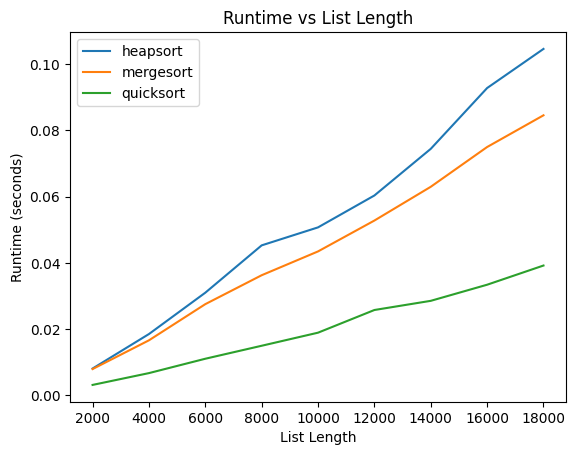

In [5]:
measure_runtime([heapsort, mergesort, quicksort])
plot_runtime([heapsort, mergesort, quicksort])

**Answer:**

Observations:
1. The performance of Quick Sort is much better than Merge Sort and Heap Sort. At the beginning, the performance of Merge Sort and Heap Sort is relatively close, but as the list length increases, the performance gap becomes wider.
2. The runtime of these three sorting algorithms shows generally stable linear growth, as the list length grows. However, since Quick Sort chooses the last element as pivot as pivot in this case, there was a noticeable increase in the rate of the runtime growth from a certain list length, when we tested the runtime performances, but it's still better than the other two.

Explainations:
1. Quick Sort uses partition to process the arrays and each swap only involves two elements each time, which increases the efficiency. And as in-place algorithm, it doesn't need additional space to store the sorted elements, which reduces the runtime.
2. Merge Sort is not in-place algorithm, so it creates temporary arrays to store the elements of the two halves while combining them into one sorted array.
3. Heap Sort extracts the root and heapifies recursively until the heap property is restored, which leads to a larger number of comparisons and swaps between the elements.
4. The efficiency of these algorithms seem to be quite dependent on randomness. For example, what the pivot value in quicksort is changes the time it takes to sort the array (if we're unlucky, we might get the largest value of the array every time). This randomness can be observed after running the algorithms a couple of times, as the lines have irregular spikes.

Comparison to algorithms in Assignment 1:
The performances of these three algorithms are significantly better than Insertion Sort, Selection Sort and Sink Sort, which have O(n²)complexity. And as the list length grows, the runtime increases at an accelerating rate.

### 5. Runtime Approximations (1 point)

Remark: In this question, we will take Heap Sort as an example, but the results also carry over to Merge Sort or Quick Sort.

Using the statistics from the tests, find a constant `c` such that `f_heap(n) = c * n` is a *linear* (!) function which *approximately* describes the runtime of Heap Sort in *seconds*, depending on the input size `n`.

Implement the function and look at the runtime plot below. You should notice that `f_heap` seems to be a good approximation of the runtime of Heap Sort (usually not much more than 10% error), at least in the displayed range of `n = 2000, ..., 18000`.

Compare to the asymptotic runtime of Heap Sort known from the lecture. How do you explain your observation? Will the approximation still be good with smaller or larger input sizes?

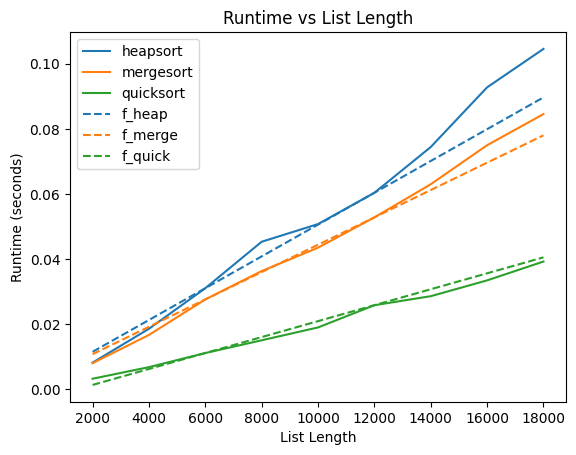

In [6]:
import numpy as np

def get_coefs(dict, key, sizes):
    """gets some samples from the runtime"""
    lhs, rhs = [], []
    # extract the runtimes from two samples
    sample1 = dict[key][2]
    sample2 = dict[key][5]
    
    lhs = [[sizes[2],1], 
           [sizes[5],1]]
    rhs = [sample1, sample2]
    #convert to np arrays
    lhs, rhs = np.array(lhs), np.array(rhs)
    coef = np.linalg.solve(lhs, rhs)
    return coef

heap_coefs = get_coefs(runtimeDict, "heapsort", sizes)
merge_coefs = get_coefs(runtimeDict, "mergesort", sizes)
quick_coefs = get_coefs(runtimeDict, "quicksort", sizes)

def f_heap(size):

  return heap_coefs[1]+heap_coefs[0] * size

def f_merge(size):

  return merge_coefs[1]+merge_coefs[0] * size

def f_quick(size):

  return quick_coefs[1]+quick_coefs[0] * size

# plot all functions
runtimeDict[f_heap.__name__] = [f_heap(size) for size in sizes]
runtimeDict[f_merge.__name__] = [f_merge(size) for size in sizes]
runtimeDict[f_quick.__name__] = [f_quick(size) for size in sizes]

plot_runtime([heapsort, mergesort, quicksort], [f_heap, f_merge, f_quick])

**Answer:**

This seems to be a very good approximation of the runtimes in most cases. Although, one might be unlucky and pick samples that are not representative.However, from the lectures we learned that the time complexity of heap sort is O(n logn). Despite this, a linear funciton seems to be a good approximation. Why could this be?

The first step of heap sort is to build a max heap. This is done by heapifying all nodes in the tree, and has a worst-case time complexity of O(n). However, this is not a dominant factor in the complexity analysis, because it is smaller than the complexity of the rest of the algorithm, which consists of moving the top item (root), which is the item with the highest value as defined by the max heap, to the end of the tree, and re-heapifying. Re-heapifying has a time complexity of O(logn) and is performed for every node, meaning the full algorithm is bounded by O(nlogn). Because logn is a function that grows very slowly compared to a linear function, this growth is not very noticable with smaller datasets. However, if when n grows infinately large, the difference between O(nlogn) and O(n) might be more noticable.

